# Online Payment Fraud Detection

Data Source: /https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection/data

### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression

### Ignores all warning messages

In [2]:
warnings.filterwarnings("ignore")

### Reading the csv file

In [3]:
df = pd.read_csv("onlinefraud.csv")
# Displaying top 5 rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Dispalying rows and columns
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.head().T

,0,1,2,3,4
step,1,1,1,1,1
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT
amount,9839.64,1864.28,181.0,181.0,11668.14
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720
oldbalanceOrg,170136.0,21249.0,181.0,181.0,41554.0
newbalanceOrig,160296.36,19384.72,0.0,0.0,29885.86
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703
oldbalanceDest,0.0,0.0,0.0,21182.0,0.0
newbalanceDest,0.0,0.0,0.0,0.0,0.0
isFraud,0,0,1,1,0


## Data Cleaning

In [8]:
# Displaying datatypes
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
# Converting datatypes from objects
df = df.convert_dtypes()
df.dtypes

step                       Int64
type              string[python]
amount                   Float64
nameOrig          string[python]
oldbalanceOrg            Float64
newbalanceOrig           Float64
nameDest          string[python]
oldbalanceDest           Float64
newbalanceDest           Float64
isFraud                    Int64
isFlaggedFraud             Int64
dtype: object

#### Analysing missing values

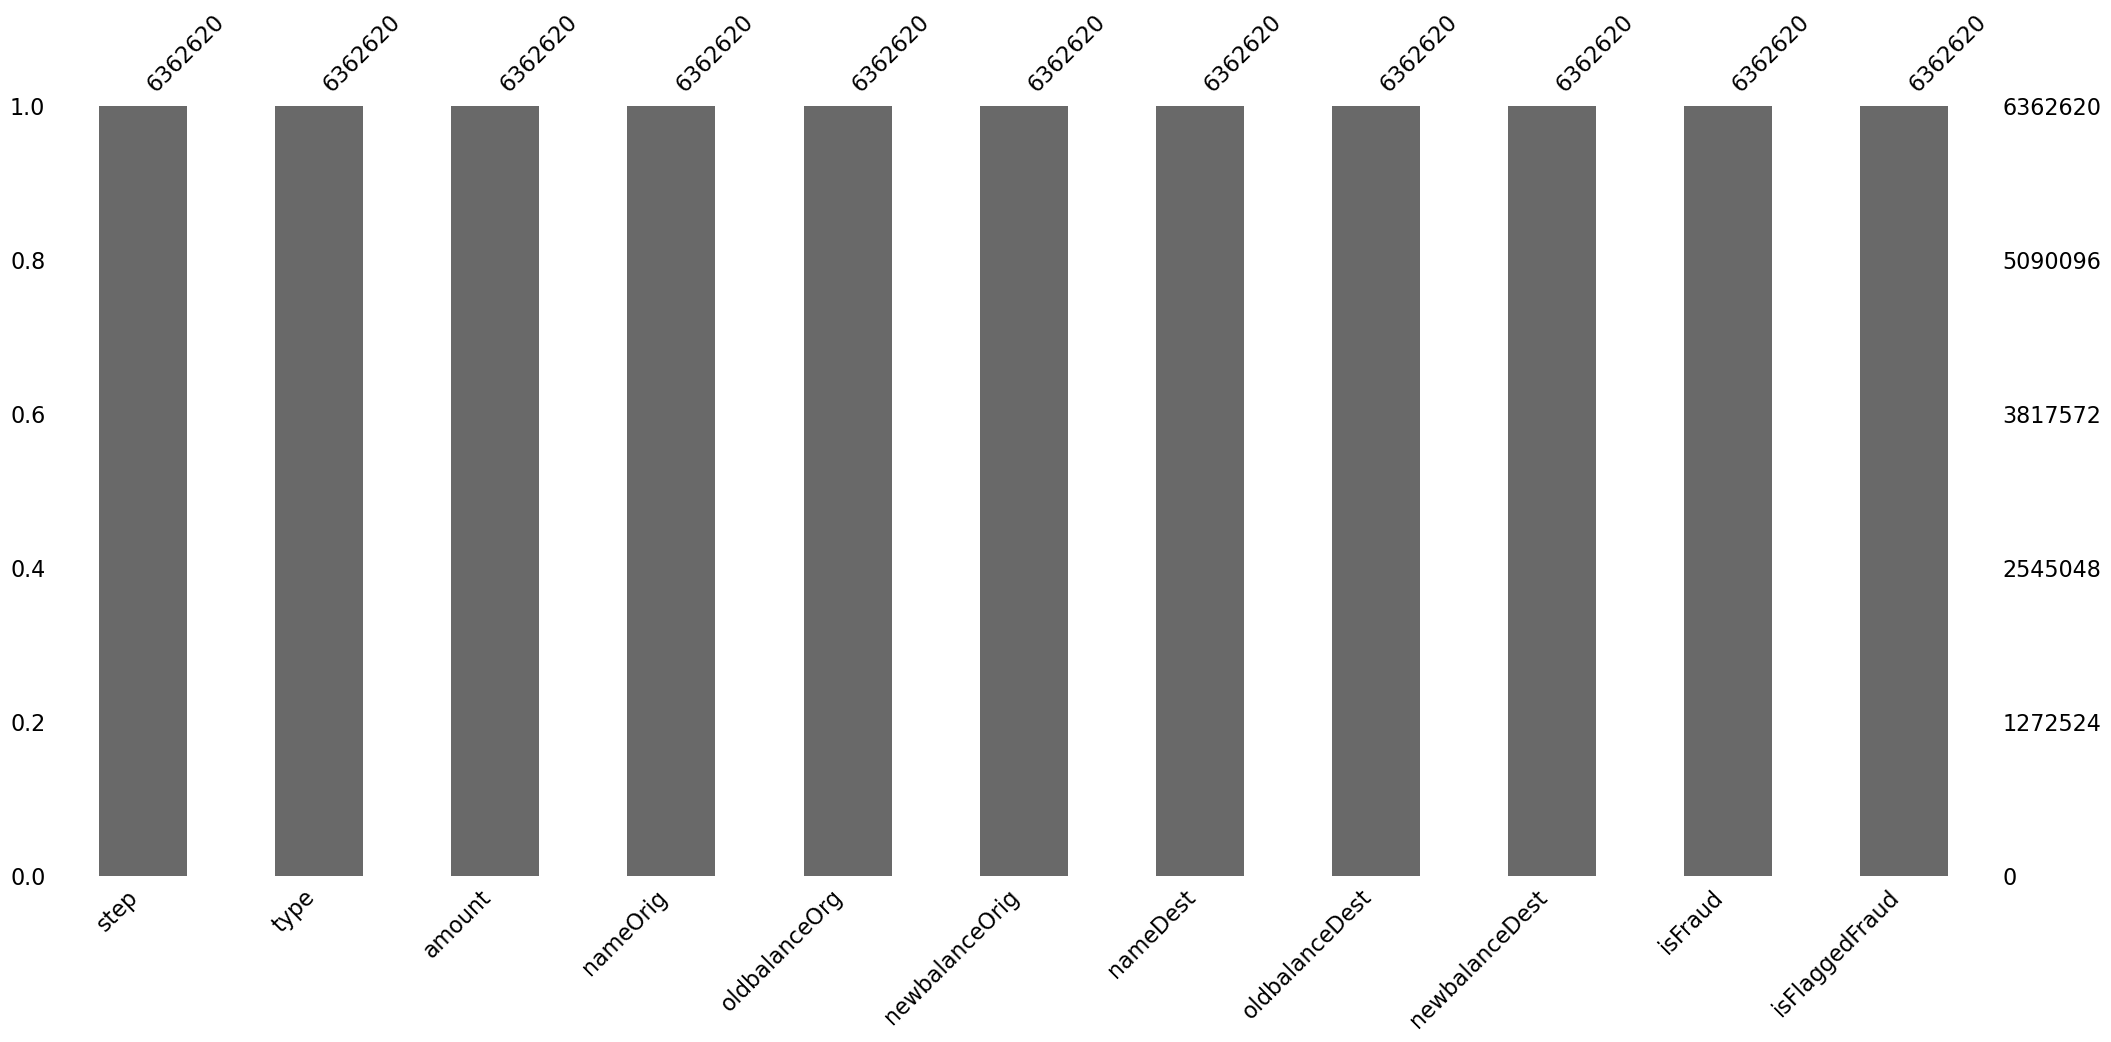

In [10]:
# Displaying missing values
msno.bar(df)
plt.show()

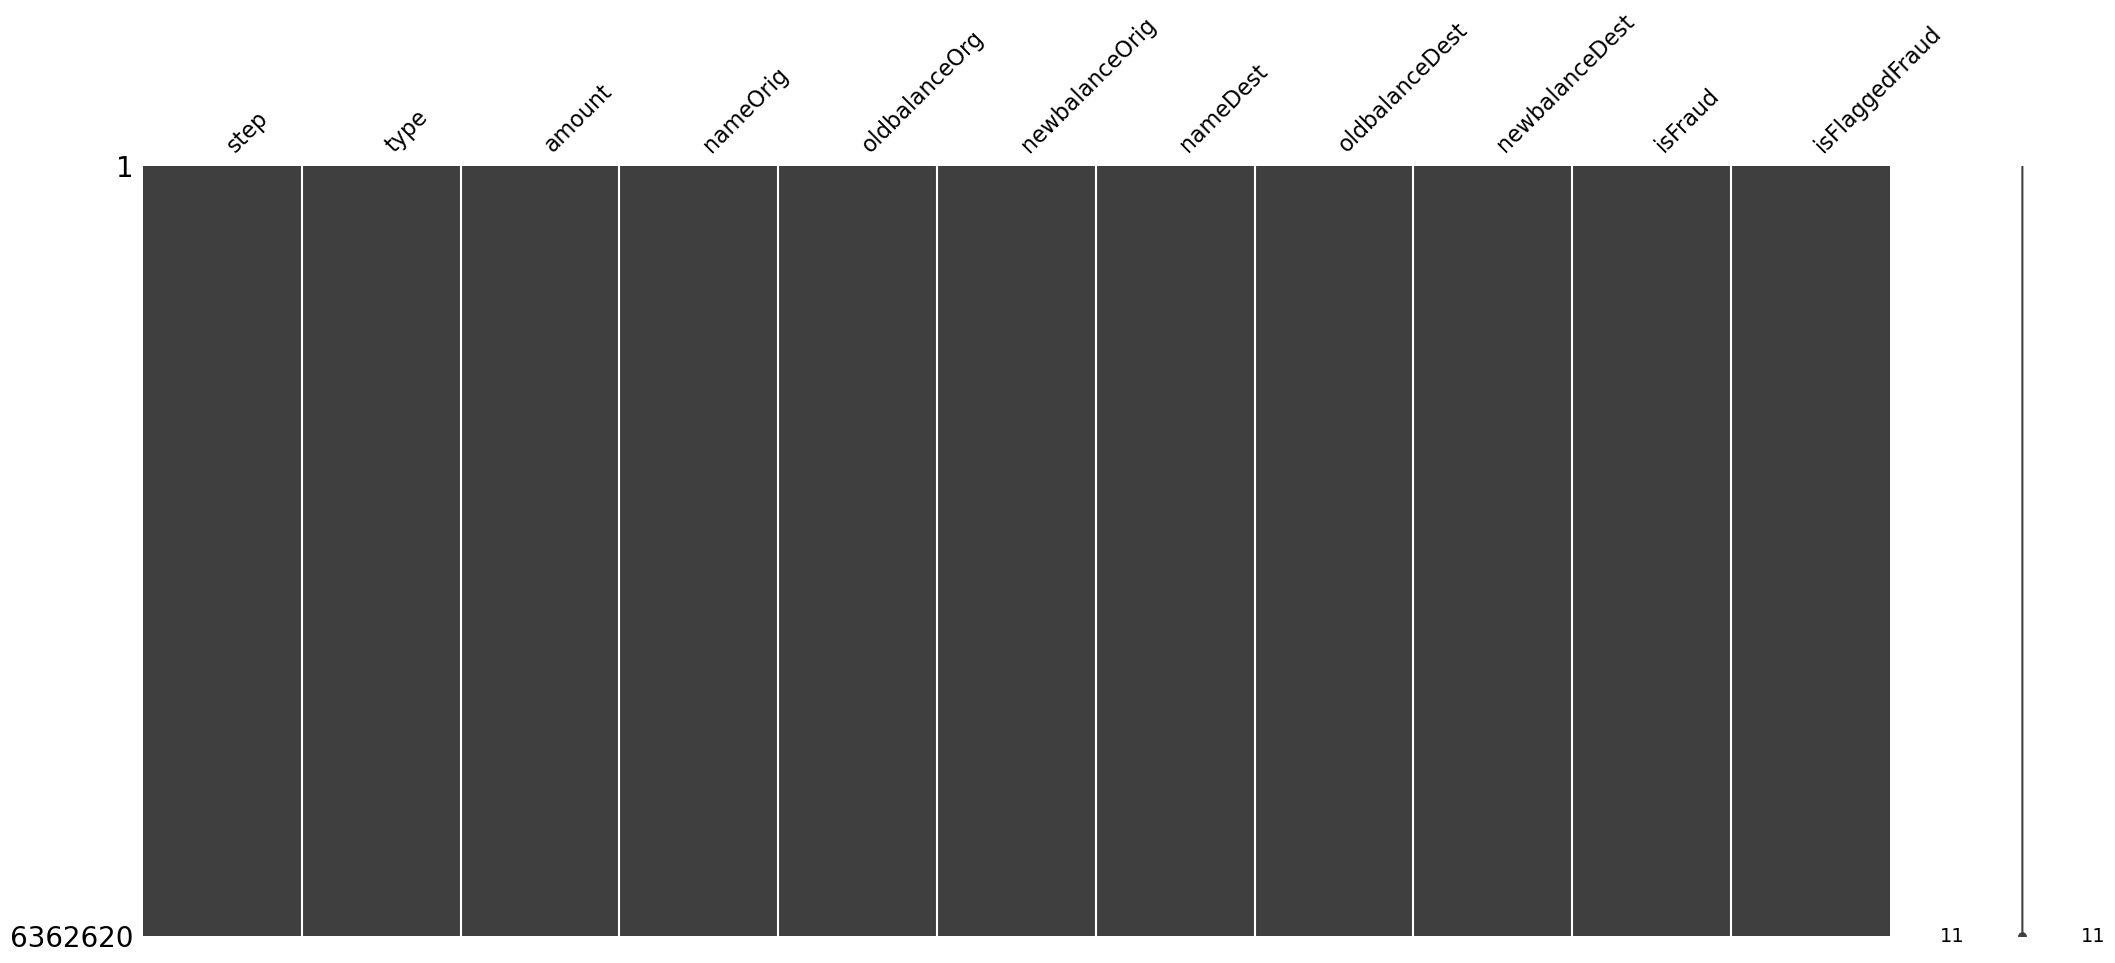

In [11]:
# Displaying missing values
msno.matrix(df)
plt.show()

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Checking for outliers

<Axes: >

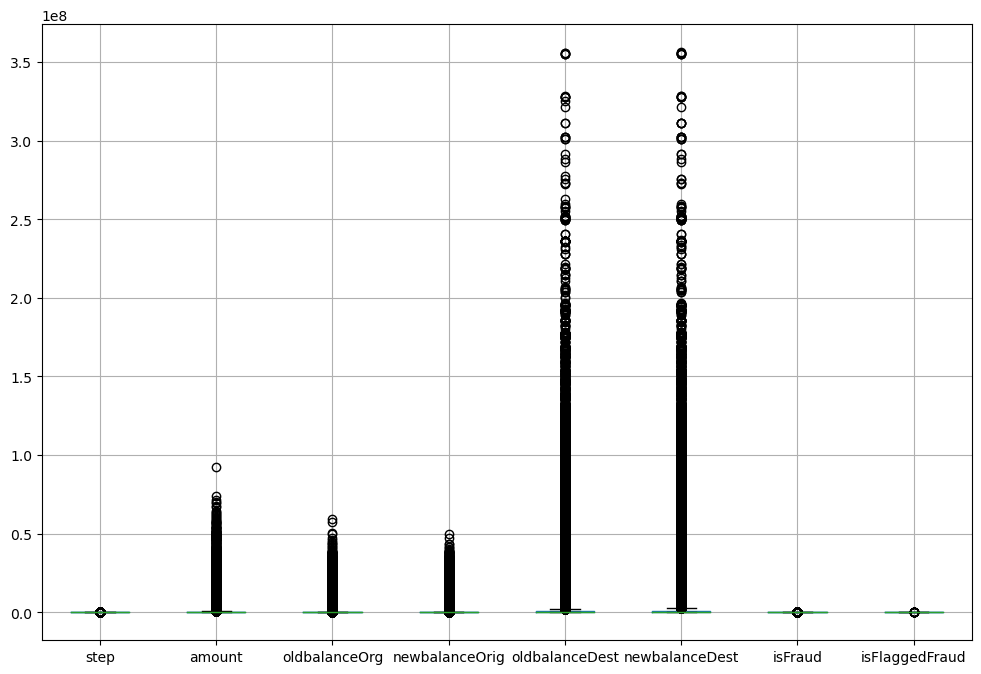

In [13]:
plt.figure(figsize=(12,8))
df.boxplot()

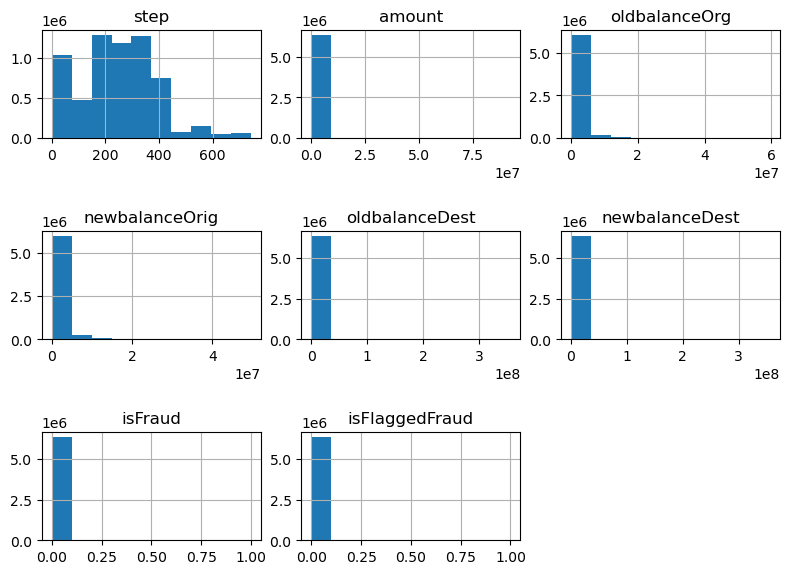

In [14]:
ig, ax = plt.subplots(1, 1, figsize=(8, 6))
df.hist(ax=ax)
plt.tight_layout()
plt.show()

## Balancing the data

In [15]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: Int64

### OverSampling: SMOTE

In [16]:
X = df.drop(columns=['isFraud','type','nameDest','nameOrig'], axis=1)# Remove the class column from the main dataset
print(X)

         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64       170136.0       160296.36             0.0   
1           1     1864.28        21249.0        19384.72             0.0   
2           1       181.0          181.0             0.0             0.0   
3           1       181.0          181.0             0.0         21182.0   
4           1    11668.14        41554.0        29885.86             0.0   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13             0.0             0.0   
6362616   743  6311409.28     6311409.28             0.0             0.0   
6362617   743  6311409.28     6311409.28             0.0        68488.84   
6362618   743   850002.52      850002.52             0.0             0.0   
6362619   743   850002.52      850002.52             0.0      6510099.11   

         newbalanceDest  isFlaggedFraud  
0                   0.0               0  
1  

In [17]:
Y = df['isFraud']
print(Y)

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: Int64


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(6362620, 7) (5090096, 7) (1272524, 7)


In [20]:
from imblearn.over_sampling import SMOTE #SMOTE = synthetic minority oversampling technique
smote = SMOTE()

In [21]:
X_train = X_train.astype(float)

In [22]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
print(X_train_smote.shape)
print(Y_train_smote.shape)

(10167052, 7)
(10167052,)


### UnderSampling: Random UnderSampling

In [23]:
legit_txns = df[df.isFraud == 0]
fraud_txns = df[df.isFraud == 1]

In [24]:
print(legit_txns.shape)
print(fraud_txns.shape)

(6354407, 11)
(8213, 11)


In [25]:
legit_sample = legit_txns.sample(n=8213) # Samples 8213 transactions out of the legit transactions
undersampled_dataset = pd.concat([legit_sample, fraud_txns], axis=0)

In [26]:
undersampled_dataset['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: Int64

In [27]:
X = undersampled_dataset.drop(columns=['isFraud','type','nameDest','nameOrig'], axis=1) # Remove the class column from the undersampled dataset
print(X)

         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2431806   202   286206.68        42002.0       328208.68             0.0   
3567988   260      3666.8            0.0             0.0             0.0   
3271849   251    22347.58       499045.0       476697.42             0.0   
5338731   374   308644.49          510.0       309154.49             0.0   
3411205   256     4689.55            0.0             0.0             0.0   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13             0.0             0.0   
6362616   743  6311409.28     6311409.28             0.0             0.0   
6362617   743  6311409.28     6311409.28             0.0        68488.84   
6362618   743   850002.52      850002.52             0.0             0.0   
6362619   743   850002.52      850002.52             0.0      6510099.11   

         newbalanceDest  isFlaggedFraud  
2431806             0.0               0  
356

In [28]:
Y = undersampled_dataset['isFraud']
print(Y)

2431806    0
3567988    0
3271849    0
5338731    0
3411205    0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 16426, dtype: Int64


In [29]:
X_train_undersampled, X_test_undersampled, Y_train_undersampled, Y_test_undersampled = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [30]:
print(X.shape, X_train_undersampled.shape, X_test_undersampled.shape)

(16426, 7) (13140, 7) (3286, 7)


## Model training

### Oversampling

In [31]:
scaler = StandardScaler()
X_train_scaled_smote = scaler.fit_transform(X_train_smote)

### Undersampling

In [32]:
X_train_scaled_undersampled = scaler.fit_transform(X_train_undersampled)
X_test_scaled_undersampled = scaler.transform(X_test_undersampled)

## Creating the Model instances/objects

In [33]:
LogisticRegressionModel = LogisticRegression()

### Oversampling

In [34]:
LogisticRegressionModel.fit(X_train_scaled_smote, Y_train_smote)

LogisticRegression()

### Undersampling

In [35]:
LogisticRegressionModel.fit(X_train_scaled_undersampled, Y_train_undersampled)

LogisticRegression()